### Importing libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette('deep')

### Agent Evolution

In [2]:
history = np.load('../results/history.npy', allow_pickle=True).item()

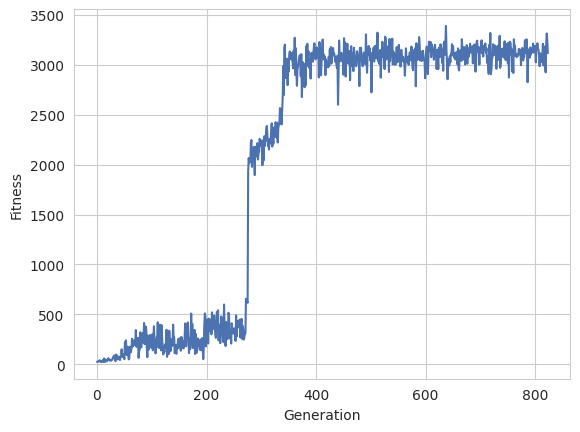

In [3]:
fig, ax = plt.subplots()
ax.plot(history['generation'], history['fitness'])
ax.set_xlabel('Generation')
ax.set_ylabel('Fitness')
fig.savefig('../images/best_fitness_per_generation.pdf')

### Professor vs. Student Comparison

In [4]:
df = pd.DataFrame({
    'Professor': [
        1214.0, 759.5, 1164.25, 977.25, 1201.0, 930.0, 1427.75, 799.5, 1006.25, 783.5,
        728.5, 419.25, 1389.5, 730.0, 1306.25, 675.5, 1359.5, 1000.25, 1284.5, 1350.0,
        751.0, 1418.75, 1276.5, 1645.75, 860.0, 745.5, 1426.25, 783.5, 1149.75, 1482.25
    ],
    'Student': [
        3064.25, 3390.25, 3480.5, 3451.25, 3249.5, 3301.0, 3093.5, 3609.75, 3187.5, 3277.75,
        2834.0, 3381.5, 3482.5, 3511.5, 4017.0, 3360.25, 3217.75, 3314.0, 3204.5, 3127.0,
        3158.25, 2808.5, 3020.0, 2717.5, 3245.0, 3065.0, 3502.75, 3337.0, 3511.0, 3661.0
    ]
})

df

,Professor,Student
0,1214.00,3064.25
1,759.50,3390.25
2,1164.25,3480.50
3,977.25,3451.25
4,1201.00,3249.50
5,930.00,3301.00
6,1427.75,3093.50
7,799.50,3609.75
8,1006.25,3187.50
9,783.50,3277.75


#### Mean and Standard Deviation

In [5]:
df.agg(['mean', 'std'])

,Professor,Student
mean,1068.183333,3286.041667
std,309.233089,268.336575


#### Hypothesis Testing

In [6]:
from scipy.stats import ttest_ind, wilcoxon

pd.DataFrame({
    'ttest': [ttest_ind(df['Professor'], df['Student'])[1]],
    'wilcoxon': [wilcoxon(df['Professor'], df['Student'])[1]]
})

,ttest,wilcoxon
0,9.397984e-37,1.862645e-09


#### Boxplot

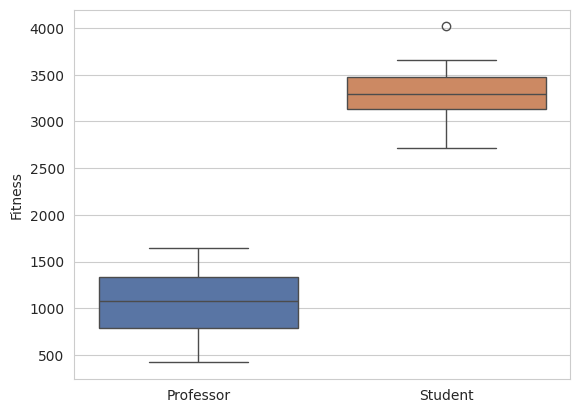

In [7]:
fig, ax = plt.subplots()
sns.boxplot(data=df)
ax.set_ylabel('Fitness')
fig.savefig('../images/boxplot.pdf')